# Pre-amble

In [1]:
# loading the required packages
import pandas as pd
import numpy as np
import datetime
import random
import re
import os
import plotnine
from plotnine import *

# for repeated printouts 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# to custom displays of row-column df printouts
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Data import and basic dataset information

## Intake data

Here, we load the analysis-ready intake data, and print out some of the basic information about the data:

In [2]:
# loading the intake data
intake_analysis = pd.read_csv('../data/csv/intake_analysis.csv')

# then, we filter only for the black/white defendants 
intake_bw = intake_analysis[(intake_analysis.is_white == True) | 
                            (intake_analysis.is_black == True)].copy()

In [3]:
# printing out the basic info
intake_bw.shape
intake_bw.dtypes

(369399, 36)

Unnamed: 0                   int64
CASE_ID                      int64
CASE_PARTICIPANT_ID          int64
RECEIVED_DATE               object
OFFENSE_CATEGORY            object
PARTICIPANT_STATUS          object
AGE_AT_INCIDENT            float64
RACE                        object
GENDER                      object
INCIDENT_CITY               object
INCIDENT_BEGIN_DATE         object
INCIDENT_END_DATE           object
LAW_ENFORCEMENT_AGENCY      object
LAW_ENFORCEMENT_UNIT        object
ARREST_DATE                 object
FELONY_REVIEW_DATE          object
FELONY_REVIEW_RESULT        object
UPDATE_OFFENSE_CATEGORY     object
is_black                    object
is_hispanic                   bool
is_white                    object
is_hisp                    float64
is_female                   object
age_cleaned                float64
felony_review_date          object
felony_review_year         float64
felony_review_month        float64
felony_review_day          float64
felony_review_ym    

In [4]:
# printing out the head of the df
intake_bw.sample(10)

,Unnamed: 0,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PARTICIPANT_STATUS,AGE_AT_INCIDENT,RACE,GENDER,INCIDENT_CITY,INCIDENT_BEGIN_DATE,INCIDENT_END_DATE,LAW_ENFORCEMENT_AGENCY,LAW_ENFORCEMENT_UNIT,ARREST_DATE,FELONY_REVIEW_DATE,FELONY_REVIEW_RESULT,UPDATE_OFFENSE_CATEGORY,is_black,is_hispanic,is_white,is_hisp,is_female,age_cleaned,felony_review_date,felony_review_year,felony_review_month,felony_review_day,felony_review_ym,sa_office_period,sa_timedelta,BRA_period,BRA_timedelta,fr_is_approved,fr_is_rejected,fr_is_investigated
2330,2330,506529648298,348147528130,01/20/2011,Narcotics,Approved,32.0,Black,Male,Chicago,01/17/2011,NaN,CHICAGO PD,District 6 - Gresham,01/17/2011 02:45:00 PM,NaN,NaN,Narcotics,True,False,False,NaN,False,32.0,NaN,NaN,NaN,NaN,NaN,False,NaN,False,NaN,False,False,False
356907,356907,575148224456,425907452276,02/03/2019,UUW - Unlawful Use of Weapon,Approved,31.0,Black,Male,Chicago,02/03/2019,NaN,CHICAGO PD,District 3 - Grand Crossing,02/03/2019 01:31:00 AM,02/03/2019,Approved,UUW - Unlawful Use of Weapon,True,False,False,NaN,False,31.0,2019-02-03,2019.0,2.0,3.0,2019-02,True,26.0,True,20.0,True,False,False
183819,183819,541009255433,385989739062,09/23/2014,Narcotics,Approved,22.0,White,Male,Hoffman Estates,09/21/2014,NaN,HOFFMAN ESTATES PD,NaN,09/21/2014 11:58:00 PM,NaN,NaN,Narcotics,False,False,True,NaN,False,22.0,NaN,NaN,NaN,NaN,NaN,False,NaN,False,NaN,False,False,False
103285,103285,525708117741,368440753777,02/01/2013,Retail Theft,Approved,35.0,White,Male,Skokie,02/01/2013,NaN,SKOKIE PD,NaN,02/01/2013 08:37:00 PM,NaN,NaN,Retail Theft,False,False,True,NaN,False,35.0,NaN,NaN,NaN,NaN,NaN,False,NaN,False,NaN,False,False,False
72920,72920,519960577887,362310723949,06/28/2012,Narcotics,Approved,19.0,Black,Male,NaN,06/26/2012,NaN,CHICAGO PD,District 15 - Austin,06/26/2012 09:03:00 PM,NaN,NaN,Narcotics,True,False,False,NaN,False,19.0,NaN,NaN,NaN,NaN,NaN,False,NaN,False,NaN,False,False,False
347980,347980,573349290121,423924918758,11/05/2018,UUW - Unlawful Use of Weapon,Approved,26.0,Black,Male,Cicero,11/05/2018,NaN,CHICAGO PD,NaN,11/05/2018 03:36:00 AM,11/05/2018,Rejected,UUW - Unlawful Use of Weapon,True,False,False,NaN,False,26.0,2018-11-05,2018.0,11.0,5.0,2018-11,True,23.0,True,17.0,False,True,False
317570,317570,567381325948,417061755900,02/06/2018,UUW - Unlawful Use of Weapon,Approved,30.0,Black,Male,Chicago,02/05/2018,NaN,CHICAGO PD,NaN,02/05/2018 09:40:00 PM,02/06/2018,Approved,UUW - Unlawful Use of Weapon,True,False,False,NaN,False,30.0,2018-02-06,2018.0,2.0,6.0,2018-02,True,14.0,True,8.0,True,False,False
416134,416134,587322832528,440553217839,10/15/2020,Fraud,Continued Investigation,21.0,Black,Male,Harvey,03/20/2020,NaN,OAK FOREST PD,NaN,NaN,10/15/2020,Continued Investigation,Fraud,True,False,False,NaN,False,21.0,2020-10-15,2020.0,10.0,15.0,2020-10,True,46.0,True,40.0,False,False,True
384075,384075,580604843050,432172503771,10/02/2019,Aggravated DUI,Approved,NaN,Black,Male,NaN,NaN,NaN,CHICAGO PD,NaN,10/02/2019 02:30:00 AM,10/02/2019,Approved,Aggravated DUI,True,False,False,NaN,False,NaN,2019-10-02,2019.0,10.0,2.0,2019-10,True,34.0,True,28.0,True,False,False
393958,393958,582639155601,434599893290,01/08/2020,UUW - Unlawful Use of Weapon,Approved,33.0,Black,Male,Lynwood,01/07/2020,NaN,LYNWOOD PD,NaN,01/07/2020 09:56:00 PM,01/08/2020,Approved,UUW - Unlawful Use of Weapon,True,False,False,NaN,False,33.0,2020-01-08,2020.0,1.0,8.0,2020-01,True,37.0,True,31.0,True,False,False


## Sentencing data

Here, we'll load our analysis-ready sentencing data, and print out some of the basic information about the data:

In [5]:
# loading the analysis-ready dataset
sentencing_analysis = pd.read_csv('../data/csv/sentencing_analysis.csv')

# we then filter for only black/white defendants
sentencing_bw = sentencing_analysis[(sentencing_analysis.is_black == True) | 
                                    (sentencing_analysis.is_white == True)].copy()

C:\Users\Sean Hambali\AppData\Local\Temp\ipykernel_22652\1287713787.py:2: DtypeWarning: Columns (10,11,14,25) have mixed types. Specify dtype option on import or set low_memory=False.


In [6]:
# printing out basic dataset info
sentencing_bw.dtypes

CASE_ID                                  int64
CASE_PARTICIPANT_ID                      int64
RECEIVED_DATE                           object
OFFENSE_CATEGORY                        object
PRIMARY_CHARGE_FLAG                       bool
CHARGE_ID                                int64
CHARGE_VERSION_ID                        int64
DISPOSITION_CHARGED_OFFENSE_TITLE_x     object
CHARGE_COUNT                             int64
DISPOSITION_DATE                        object
DISPOSITION_CHARGED_CHAPTER             object
DISPOSITION_CHARGED_ACT                 object
DISPOSITION_CHARGED_SECTION             object
DISPOSITION_CHARGED_CLASS               object
DISPOSITION_CHARGED_AOIC                object
CHARGE_DISPOSITION                      object
CHARGE_DISPOSITION_REASON               object
SENTENCE_JUDGE                          object
SENTENCE_COURT_NAME                     object
SENTENCE_COURT_FACILITY                 object
SENTENCE_PHASE                          object
SENTENCE_DATE

In [7]:
# printing a sample of the dataset
sentencing_analysis.sample(n=10)

,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE_x,CHARGE_COUNT,DISPOSITION_DATE,DISPOSITION_CHARGED_CHAPTER,DISPOSITION_CHARGED_ACT,DISPOSITION_CHARGED_SECTION,DISPOSITION_CHARGED_CLASS,DISPOSITION_CHARGED_AOIC,CHARGE_DISPOSITION,CHARGE_DISPOSITION_REASON,SENTENCE_JUDGE,SENTENCE_COURT_NAME,SENTENCE_COURT_FACILITY,SENTENCE_PHASE,SENTENCE_DATE,SENTENCE_TYPE,CURRENT_SENTENCE_FLAG,COMMITMENT_TYPE,COMMITMENT_TERM,COMMITMENT_UNIT,LENGTH_OF_CASE_in_Days,AGE_AT_INCIDENT,RACE,GENDER,INCIDENT_CITY,INCIDENT_BEGIN_DATE,INCIDENT_END_DATE,LAW_ENFORCEMENT_AGENCY,LAW_ENFORCEMENT_UNIT,ARREST_DATE,FELONY_REVIEW_DATE,FELONY_REVIEW_RESULT,ARRAIGNMENT_DATE,UPDATED_OFFENSE_CATEGORY,is_black,is_hisp,is_white,is_female,age_cleaned,sentence_date,sentence_year,sentence_month,sentence_day,sentence_ym,sa_office_period,sa_timedelta,sa_timedelta_days,BRA_period,BRA_timedelta,BRA_timedelta_days,sentencing_num,sentencing_term_d,sentencing_term_y,is_incarcerated,is_on_probation,regrouped_offense,eligible_offense,DISPOSITION_CHARGED_OFFENSE_TITLE_y,uccs_code,probability,mfj_code,ncrp_code,ncic_code,nibrs_code,charge_desc,offense_category_code,offense_category_desc,offense_type_code,offense_type_desc
157244,571053964102,421331718016,07/26/2018 12:00:00 AM,Theft,True,10483984500467,1064564855839,POSSESSION OF A STOLEN MOTOR VEHICLE,1,01/16/2019 12:00:00 AM,625,5,4-103(a)(1),2,5710001,Plea Of Guilty,NaN,Geary W Kull,District 4 - Maywood,Maywood Courthouse,Original Sentencing,01/16/2019 12:00:00 AM,Prison,True,Probation,24.0,Months,131.0,29.0,White,Male,Brookfield,07/25/2018 12:00:00 AM,NaN,BROOKFIELD PD,NaN,07/25/2018 10:54:00 PM,07/26/2018 12:00:00 AM,Continued Investigation,09/07/2018 12:00:00 AM,Possession of Stolen Motor Vehicle,False,False,True,0.0,29.0,2019-01-16,2019,1,16,2019-01,True,25,776,True,19,583,24.0,732.0,2.005479,False,True,Possession of Stolen Motor Vehicle,False,POSSESSION OF A STOLEN MOTOR VEHICLE,2030,0.995566,145,210,1212;2401;2402;2403;2404;2405;2406;2407;2408;2...,240,Auto Theft,22,Auto theft,2,Property
63420,526986578794,369831361541,03/22/2013 12:00:00 AM,Narcotics,True,9036376395376,921677090752,POSSESSION OF CANNABIS,1,06/04/2013 12:00:00 AM,720,550,4(d),4,5015400,Plea Of Guilty,NaN,Neil J Linehan,District 5 - Bridgeview,Bridgeview Courthouse,Original Sentencing,06/04/2013 12:00:00 AM,Probation,True,710/410 Probation,24.0,Months,33.0,20.0,White,Male,Chicago,03/18/2013 12:00:00 AM,NaN,CHICAGO PD,District 3 - Grand Crossing,03/18/2013 07:53:00 PM,NaN,NaN,05/02/2013 12:00:00 AM,Narcotics,False,False,True,0.0,20.0,2013-06-04,2013,6,4,2013-06,False,-42,-1276,False,-48,-1469,24.0,732.0,2.005479,False,True,Narcotics,True,POSSESSION OF CANNABIS,3150,0.999510,285,400,3562;3565;3567,NaN,Possession/Use of Marijuana,49,Possession/use - marijuana/hashish,3,Drug
96674,541535360703,386596390256,10/15/2014 12:00:00 AM,Forgery,True,9477770541090,960496740907,FORGERY,1,06/16/2015 12:00:00 AM,720,5,17-3(a)(2),3,1080100,Plea Of Guilty,NaN,Mary C Roberts,District 1 - Chicago,26TH Street,Original Sentencing,06/16/2015 12:00:00 AM,Probation,True,Probation,24.0,Months,224.0,32.0,Black,Male,Chicago,10/14/2014 12:00:00 AM,NaN,CHICAGO PD,NaN,10/14/2014 02:48:00 PM,10/15/2014 12:00:00 AM,Approved,11/04/2014 12:00:00 AM,Forgery,True,False,False,0.0,32.0,2015-06-16,2015,6,16,2015-06,False,-18,-534,False,-24,-727,24.0,732.0,2.005479,False,True,Forgery,False,FORGERY,2040,0.979203,150,220;810;820;830,2501;2502;2503;2504;2505;2506;2507;2508;2509;2...,250;26A;26B;26C;26D;26E;26F;90A,Forgery/Fraud,23,Forgery/fraud,2,Property
16550,507209759282,348883523157,02/19/2011 12:00:00 AM,Retail Theft,True,8427438186499,852737744115,RETAIL THEFT,1,04/11/2011 12:00:00 AM,720,5,16A-3(a),4,0015600,Plea Of Guilty,NaN,Kevin M Sheehan,District 1 - Chicago,26TH Street,Original Sentencing,03/31/2011 12:00:00 AM,Prison,True,Illinois Department of Corrections,3.0,Year(s),0.0,23.0,Black,Male,Chicago

In [8]:
# what's the shape of the data? 
print("Data shape: " + str(sentencing_bw.shape))

Data shape: (150245, 76)


# Research questions:

Here, we aim to provide some preliminary tabulations on the following questions:

- Does State Attorney Kim Foxx's entry lead to any changes in black-white felony review approval probability?
- Does State Attorney Kim Foxx's entry lead to any changes in black-white incarceration probability?
- Does State Attorney Kim Foxx's entry lead to any changes in black-white probability of probation?
- Does State Attorney Kim Foxx's entry lead to any changes in black-white sentencing time?

# Preliminary graphs

## Felony review

C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


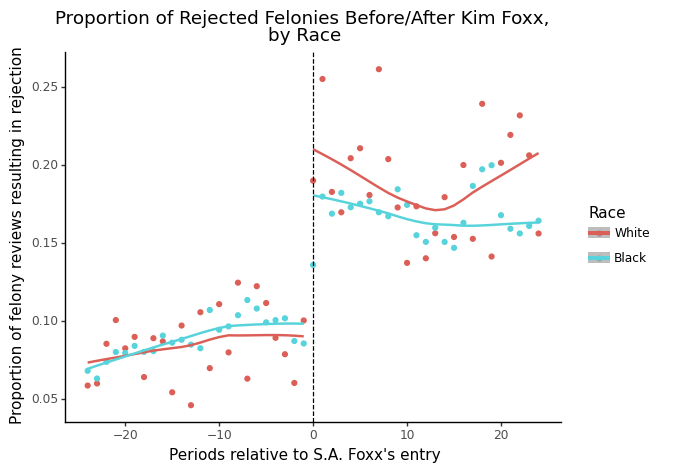

<ggplot: (182972083920)>

C:\Users\Public\anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 5 x 5 in image.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: ../output/intake_bw_graph.png
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


In [39]:
# creating a by-race summary of felony review results
intake_bw_summary = intake_bw.groupby(['sa_timedelta', 'is_black'])['fr_is_rejected'].agg([('prop', 'mean'), 
                                                                                           ('n', 'sum')]).reset_index()

# filtering to specific timedelta
intake_bw_summary = intake_bw_summary[(intake_bw_summary.sa_timedelta >= -24) & 
                                      (intake_bw_summary.sa_timedelta <= 24)].copy()

# creating a by-race trend of felony review results
intake_bw_graph = (
    
    ggplot(intake_bw_summary, aes(x = 'sa_timedelta', y = 'prop', 
                                  group = 'is_black', color = 'is_black')) +
    geom_point() +
    geom_smooth(data = intake_bw_summary[intake_bw_summary.sa_timedelta < 0]) +
    geom_smooth(data = intake_bw_summary[intake_bw_summary.sa_timedelta >= 0]) +
    geom_vline(xintercept = 0, linetype = "dashed") +
    labs(x = "Periods relative to S.A. Foxx's entry", 
         y = 'Proportion of felony reviews resulting in rejection', 
         title = 'Proportion of Rejected Felonies Before/After Kim Foxx, \nby Race') +
    scale_color_discrete(labels = ['White', 'Black']) +
    theme_classic() +
    guides(color = guide_legend(title = 'Race'))
)

# plotting the graph 
intake_bw_graph

# saving the graph
intake_bw_graph.save("../output/intake_bw_graph.png", width = 5, height = 5, dpi = 100)

Creating the same type of graph but differentiating by offense categories (considering the top 5 categories only): 

C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\li

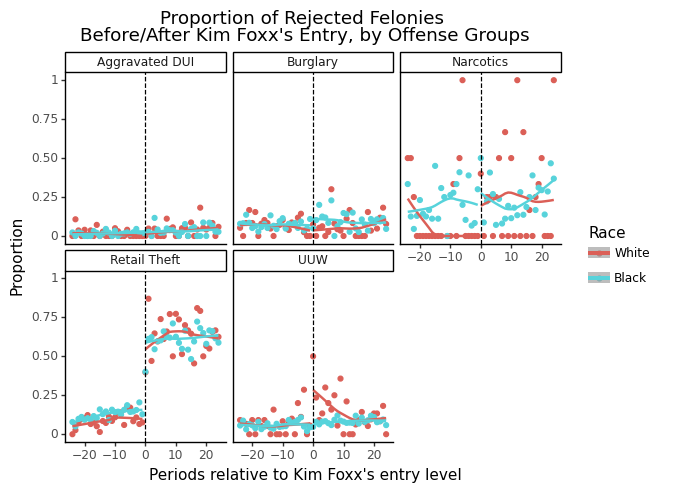

<ggplot: (182973656080)>

C:\Users\Public\anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 5 x 5 in image.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: ../output/intake_bw_top5_graph.png
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals

In [41]:
# storing the top 5 offense category in a list
intake_top5_offense = list(intake_bw.UPDATE_OFFENSE_CATEGORY.value_counts().reset_index()['index'][0:5])

# filtering for top 5 offenses 
intake_bw_top5_summary = intake_bw[intake_bw.UPDATE_OFFENSE_CATEGORY.isin(intake_top5_offense)].copy()

# renaming UUW 
intake_bw_top5_summary['UPDATE_OFFENSE_CATEGORY'] = intake_bw_top5_summary.UPDATE_OFFENSE_CATEGORY.str.replace('UUW - Unlawful Use of Weapon',
                                                                                                               'UUW')

# creating a by-race summary of felony review results
intake_bw_top5_summary = intake_bw_top5_summary.groupby(['sa_timedelta','UPDATE_OFFENSE_CATEGORY', 
                                                         'is_black'])['fr_is_rejected'].agg([('prop', 'mean'), 
                                                                                             ('n', 'sum')]).reset_index()

# filtering to specific timedelta
intake_bw_top5_summary = intake_bw_top5_summary[(intake_bw_top5_summary.sa_timedelta >= -24) & 
                                                (intake_bw_top5_summary.sa_timedelta <= 24)].copy()

intake_bw_top5_summary = intake_bw_top5_summary.sort_values(['UPDATE_OFFENSE_CATEGORY', 'is_black', 'sa_timedelta'])

# creating a by-race trend of felony review results
intake_bw_top5_graph = (
    
    ggplot(intake_bw_top5_summary, aes(x = 'sa_timedelta', y = 'prop', 
                                       group = 'is_black', color = 'is_black')) +
    geom_point() +
    geom_smooth(data = intake_bw_top5_summary[intake_bw_top5_summary.sa_timedelta < 0]) +
    geom_smooth(data = intake_bw_top5_summary[intake_bw_top5_summary.sa_timedelta >= 0]) +
    geom_vline(xintercept = 0, linetype = "dashed") +
    labs(x = "Periods relative to Kim Foxx's entry level", 
         y = 'Proportion', 
         title = "Proportion of Rejected Felonies \nBefore/After Kim Foxx's Entry, by Offense Groups") +
    scale_color_discrete(labels = ['White', 'Black']) +
    facet_wrap('UPDATE_OFFENSE_CATEGORY') +
    theme_classic() +
    guides(color = guide_legend(title = 'Race'))
)

# plotting the graph 
intake_bw_top5_graph

# saving the graph
intake_bw_top5_graph.save("../output/intake_bw_top5_graph.png", width = 5, height = 5, dpi = 100)

## Incarceration gaps

C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


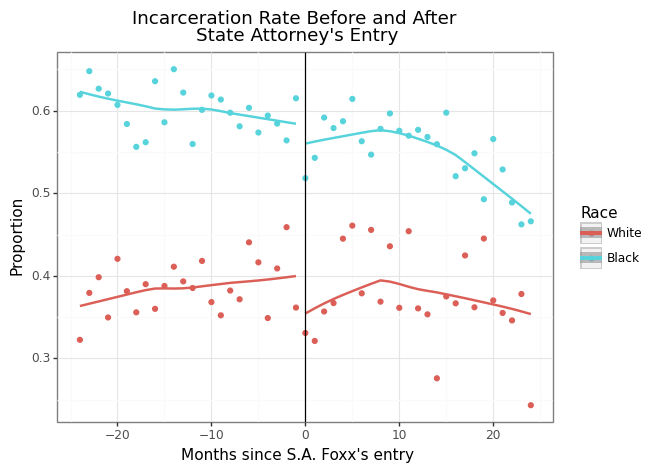

<ggplot: (182970119786)>

C:\Users\Public\anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 5 x 5 in image.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: ../output/incarc_bw_graph.png
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


In [47]:
# producing a by-race summary of incarceration proportion
incarc_bw_summary = sentencing_bw.groupby(['sa_timedelta', 'is_black'])['is_incarcerated'].agg([('prop', 'mean'), ('n', 'size')]).reset_index()

# filtering to specific timedelta
incarc_bw_summary = incarc_bw_summary[(incarc_bw_summary.sa_timedelta >= -24) & 
                                      (incarc_bw_summary.sa_timedelta <= 24)].copy()

# creating a time trend graph, by race
incarc_bw_graph = (
    ggplot(incarc_bw_summary, aes(x = 'sa_timedelta', y = 'prop', color = 'is_black')) + 
    geom_point() + 
    geom_smooth(data = incarc_bw_summary[incarc_bw_summary['sa_timedelta'] < 0]) +
    geom_smooth(data = incarc_bw_summary[incarc_bw_summary['sa_timedelta'] >= 0]) +
    theme_bw() + 
    labs(x = "Months since S.A. Foxx's entry", 
         y = "Proportion", 
         title = "Incarceration Rate Before and After \nState Attorney's Entry") +
    scale_color_discrete(labels = ['White', 'Black']) + 
    guides(color = guide_legend(title = 'Race')) + 
    geom_vline(xintercept = 0)
)

# showing the plot
incarc_bw_graph

# exporting the plot
incarc_bw_graph.save("../output/incarc_bw_graph.png", width = 5, height = 5, dpi = 100)

Looking at specific offense categories: 

C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\li

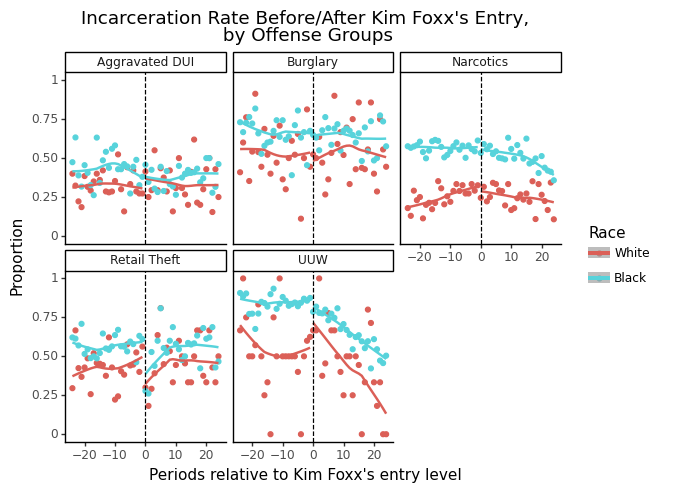

<ggplot: (182973450894)>

C:\Users\Public\anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 5 x 5 in image.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: ../output/incarc_bw_top5_graph.png
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals

In [56]:
# storing the top 5 offense category in a list
incarc_top5_offense = list(sentencing_bw.UPDATED_OFFENSE_CATEGORY.value_counts().reset_index()['index'][0:5])

# filtering for top 5 offenses 
incarc_bw_top5_summary = sentencing_bw[sentencing_bw.UPDATED_OFFENSE_CATEGORY.isin(incarc_top5_offense)].copy()

# renaming UUW 
incarc_bw_top5_summary['UPDATED_OFFENSE_CATEGORY'] = incarc_bw_top5_summary.UPDATED_OFFENSE_CATEGORY.str.replace('UUW - Unlawful Use of Weapon',
                                                                                                                 'UUW')

# creating a by-race summary of felony review results
incarc_bw_top5_summary = incarc_bw_top5_summary.groupby(['sa_timedelta','UPDATED_OFFENSE_CATEGORY', 
                                                         'is_black'])['is_incarcerated'].agg([('prop', 'mean'), 
                                                                                             ('n', 'sum')]).reset_index()

# filtering to specific timedelta
incarc_bw_top5_summary = incarc_bw_top5_summary[(incarc_bw_top5_summary.sa_timedelta >= -24) & 
                                                (incarc_bw_top5_summary.sa_timedelta <= 24)].copy()

incarc_bw_top5_summary = incarc_bw_top5_summary.sort_values(['UPDATED_OFFENSE_CATEGORY', 'is_black', 'sa_timedelta'])

# creating a by-race trend of felony review results
incarc_bw_top5_graph = (
    
    ggplot(incarc_bw_top5_summary, aes(x = 'sa_timedelta', y = 'prop', 
                                       group = 'is_black', color = 'is_black')) +
    geom_point() +
    geom_smooth(data = incarc_bw_top5_summary[incarc_bw_top5_summary.sa_timedelta < 0]) +
    geom_smooth(data = incarc_bw_top5_summary[incarc_bw_top5_summary.sa_timedelta >= 0]) +
    geom_vline(xintercept = 0, linetype = "dashed") +
    labs(x = "Periods relative to Kim Foxx's entry level", 
         y = 'Proportion', 
         title = "Incarceration Rate Before/After Kim Foxx's Entry,\n by Offense Groups") +
    scale_color_discrete(labels = ['White', 'Black']) +
    facet_wrap('UPDATED_OFFENSE_CATEGORY') +
    theme_classic() +
    guides(color = guide_legend(title = 'Race'))
)

# plotting the graph 
incarc_bw_top5_graph

# saving the graph
incarc_bw_top5_graph.save("../output/incarc_bw_top5_graph.png", width = 5, height = 5, dpi = 100)

## Probation gaps

C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


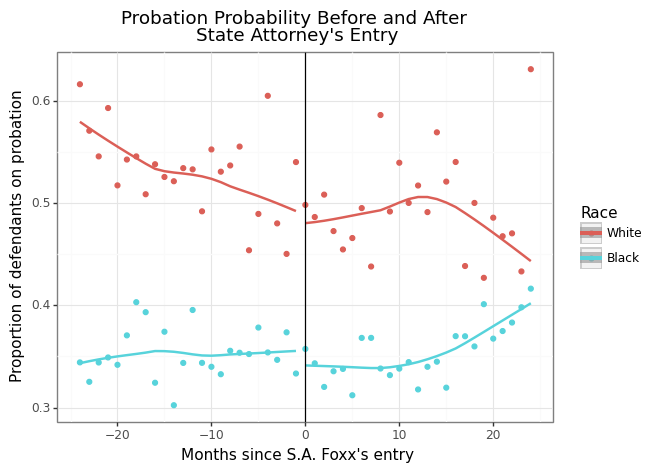

<ggplot: (182971786927)>

C:\Users\Public\anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 5 x 5 in image.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: ../output/probation_gap_bw.png
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


In [42]:
# producing a by-race summary of probation proportion
sentencing_bw_summary = sentencing_bw.groupby(['sa_timedelta', 'is_black'])['is_on_probation'].agg([('prop', 'mean'), ('n', 'size')]).reset_index()

# filtering to specific timedelta
sentencing_bw_summary = sentencing_bw_summary[(sentencing_bw_summary.sa_timedelta >= -24) & 
                                              (sentencing_bw_summary.sa_timedelta <= 24)].copy()

# creating a time trend graph, by race
probation_gap_bw = (
    ggplot(sentencing_bw_summary, aes(x = 'sa_timedelta', y = 'prop', color = 'is_black')) + 
    geom_point() + 
    geom_smooth(data = sentencing_bw_summary[sentencing_bw_summary['sa_timedelta'] < 0]) +
    geom_smooth(data = sentencing_bw_summary[sentencing_bw_summary['sa_timedelta'] >= 0]) +
    theme_bw() + 
    labs(x = "Months since S.A. Foxx's entry", 
         y = "Proportion of defendants on probation", 
         title = "Probation Probability Before and After \nState Attorney's Entry") +
    scale_color_discrete(labels = ['White', 'Black']) + 
    guides(color = guide_legend(title = 'Race')) + 
    geom_vline(xintercept = 0)
)

# showing the plot
probation_gap_bw

# exporting the plot
probation_gap_bw.save("../output/probation_gap_bw.png", width = 5, height = 5, dpi = 100)

C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


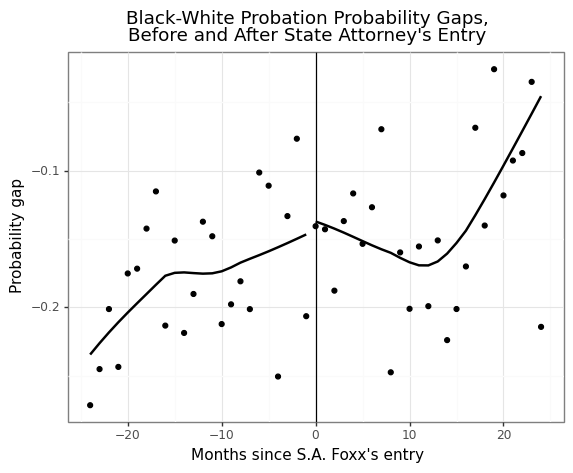

<ggplot: (182970845444)>

C:\Users\Public\anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 5 x 5 in image.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: ../output/probation_gap_bw2.png
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


In [43]:
# producing a by-race summary of probation proportion
sentencing_bw_summary = sentencing_bw.groupby(['sa_timedelta', 'is_black'])['is_on_probation'].agg([('prop', 'mean'), ('n', 'size')]).reset_index()

# filtering to specific timedelta
sentencing_bw_summary = sentencing_bw_summary[(sentencing_bw_summary.sa_timedelta >= -24) & 
                                              (sentencing_bw_summary.sa_timedelta <= 24)].copy()

# preparing the wide data
sentencing_bw_summary = pd.pivot(sentencing_bw_summary, index=['sa_timedelta'], columns='is_black', values = ['prop', 'n']).reset_index()
new_names = ['sa_timedelta', 'prop_white', 'prop_black', 'n_white', 'n_black']
sentencing_bw_summary.columns = new_names
sentencing_bw_summary['prop_bw_gap'] = sentencing_bw_summary['prop_black'] - sentencing_bw_summary['prop_white'] 

# plotting
probation_gap_bw2 = (
    ggplot(sentencing_bw_summary, aes(x = 'sa_timedelta', y = 'prop_bw_gap')) + 
    geom_point() + 
    geom_smooth(data = sentencing_bw_summary[sentencing_bw_summary['sa_timedelta'] < 0]) +
    geom_smooth(data = sentencing_bw_summary[sentencing_bw_summary['sa_timedelta'] >= 0]) +
    theme_bw() + 
    labs(x = "Months since S.A. Foxx's entry", 
         y = "Probability gap", 
         title = "Black-White Probation Probability Gaps,\nBefore and After State Attorney's Entry") +
    scale_color_discrete(labels = ['White', 'Black']) + 
    guides(color = guide_legend(title = 'Race')) + 
    geom_vline(xintercept = 0)
)

# showing the plot
probation_gap_bw2

# exporting the plot
probation_gap_bw2.save("../output/probation_gap_bw2.png", width = 5, height = 5, dpi = 100)

## Sentencing time